In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/sample_data/chennai_feb_pollute.csv')

In [ ]:
df.shape

(684, 15)

In [ ]:
df.head()

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,8558,Chennai,pm25,64,µg/m³,2024-02-08T01:00:00+00:00,2024-02-08T06:30:00+05:30,Asia/Kolkata,13.08784,80.278475,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1,8558,Chennai,pm25,69,µg/m³,2024-02-08T02:00:00+00:00,2024-02-08T07:30:00+05:30,Asia/Kolkata,13.08784,80.278475,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
2,8558,Chennai,pm25,60,µg/m³,2024-02-08T03:00:00+00:00,2024-02-08T08:30:00+05:30,Asia/Kolkata,13.08784,80.278475,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
3,8558,Chennai,pm25,52,µg/m³,2024-02-08T04:00:00+00:00,2024-02-08T09:30:00+05:30,Asia/Kolkata,13.08784,80.278475,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
4,8558,Chennai,pm25,45,µg/m³,2024-02-08T05:00:00+00:00,2024-02-08T10:30:00+05:30,Asia/Kolkata,13.08784,80.278475,NaN,NaN,NaN,Unknown Governmental Organization,AirNow


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    684 non-null    int64  
 1   location_name  684 non-null    object 
 2   parameter      684 non-null    object 
 3   value          684 non-null    int64  
 4   unit           684 non-null    object 
 5   datetimeUtc    684 non-null    object 
 6   datetimeLocal  684 non-null    object 
 7   timezone       684 non-null    object 
 8   latitude       684 non-null    float64
 9   longitude      684 non-null    float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     684 non-null    object 
 14  provider       684 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 80.3+ KB


In [ ]:
df.describe()

,location_id,value,latitude,longitude,country_iso,isMobile,isMonitor
count,684.0,684.000000,6.840000e+02,6.840000e+02,0.0,0.0,0.0
mean,8558.0,38.748538,1.308784e+01,8.027847e+01,NaN,NaN,NaN
std,0.0,13.459051,1.777657e-15,1.422125e-14,NaN,NaN,NaN
min,8558.0,12.000000,1.308784e+01,8.027848e+01,NaN,NaN,NaN
25%,8558.0,29.750000,1.308784e+01,8.027848e+01,NaN,NaN,NaN
50%,8558.0,36.000000,1.308784e+01,8.027848e+01,NaN,NaN,NaN
75%,8558.0,43.000000,1.308784e+01,8.027848e+01,NaN,NaN,NaN
max,8558.0,110.000000,1.308784e+01,8.027848e+01,NaN,NaN,NaN


In [ ]:
necessary_cols= ['value','datetimeUtc','datetimeLocal','timezone','latitude','longitude']

In [ ]:
df= df[necessary_cols]
df.head()

,value,datetimeUtc,datetimeLocal,timezone,latitude,longitude
0,64,2024-02-08T01:00:00+00:00,2024-02-08T06:30:00+05:30,Asia/Kolkata,13.08784,80.278475
1,69,2024-02-08T02:00:00+00:00,2024-02-08T07:30:00+05:30,Asia/Kolkata,13.08784,80.278475
2,60,2024-02-08T03:00:00+00:00,2024-02-08T08:30:00+05:30,Asia/Kolkata,13.08784,80.278475
3,52,2024-02-08T04:00:00+00:00,2024-02-08T09:30:00+05:30,Asia/Kolkata,13.08784,80.278475
4,45,2024-02-08T05:00:00+00:00,2024-02-08T10:30:00+05:30,Asia/Kolkata,13.08784,80.278475


In [ ]:
missing_vals= df.isnull().sum()

In [ ]:
missing_vals

value            0
datetimeUtc      0
datetimeLocal    0
timezone         0
latitude         0
longitude        0
dtype: int64

In [ ]:
df['datetimeUtc']=pd.to_datetime(df['datetimeUtc'])
df['datetimeLocal']=pd.to_datetime(df['datetimeLocal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype                                
---  ------         --------------  -----                                
 0   value          684 non-null    int64                                
 1   datetimeUtc    684 non-null    datetime64[ns, UTC]                  
 2   datetimeLocal  684 non-null    datetime64[ns, pytz.FixedOffset(330)]
 3   timezone       684 non-null    object                               
 4   latitude       684 non-null    float64                              
 5   longitude      684 non-null    float64                              
dtypes: datetime64[ns, UTC](1), datetime64[ns, pytz.FixedOffset(330)](1), float64(2), int64(1), object(1)
memory usage: 32.2+ KB


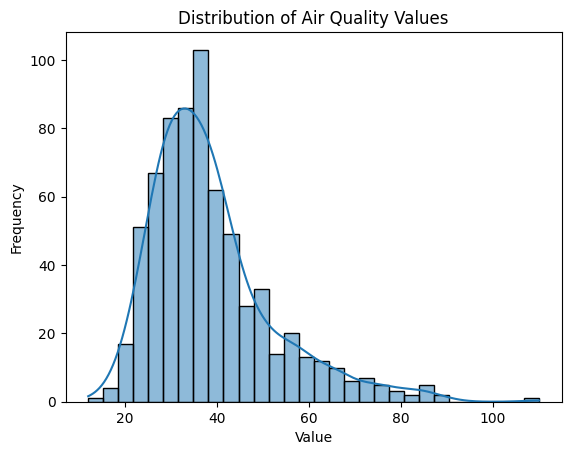

In [ ]:
sns.histplot(df['value'],bins=30,kde=True)
plt.title('Distribution of Air Quality Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
threshold = 40
df['hour'] = df['datetimeLocal'].dt.hour
df['year'] = df['datetimeLocal'].dt.year
df['month'] = df['datetimeLocal'].dt.month
df['day'] = df['datetimeLocal'].dt.day
df['pollution_level'] = df['value'].apply(lambda x: 'High' if x > threshold else 'Low')

df['day_of_week'] = df['datetimeLocal'].dt.day_name()

average_pollution_by_day = df.groupby('day_of_week')['value'].mean().reset_index()

days_with_high_pollution = average_pollution_by_day[average_pollution_by_day['value'] > threshold]

print("Days with High Pollution:")
print(days_with_high_pollution)


Days with High Pollution:
  day_of_week      value
2    Saturday  40.182796
3      Sunday  40.847826


In [ ]:
average_pollution_by_day.rename(columns={'value': 'average_pollution'}, inplace=True)
df = pd.merge(df, average_pollution_by_day, on='day_of_week', how='left')
df

,value,datetimeUtc,datetimeLocal,timezone,latitude,longitude,hour,year,month,day,pollution_level,day_of_week,average_pollution
0,64,2024-02-08 01:00:00+00:00,2024-02-08 06:30:00+05:30,Asia/Kolkata,13.08784,80.278475,6,2024,2,8,High,Thursday,39.623853
1,69,2024-02-08 02:00:00+00:00,2024-02-08 07:30:00+05:30,Asia/Kolkata,13.08784,80.278475,7,2024,2,8,High,Thursday,39.623853
2,60,2024-02-08 03:00:00+00:00,2024-02-08 08:30:00+05:30,Asia/Kolkata,13.08784,80.278475,8,2024,2,8,High,Thursday,39.623853
3,52,2024-02-08 04:00:00+00:00,2024-02-08 09:30:00+05:30,Asia/Kolkata,13.08784,80.278475,9,2024,2,8,High,Thursday,39.623853
4,45,2024-02-08 05:00:00+00:00,2024-02-08 10:30:00+05:30,Asia/Kolkata,13.08784,80.278475,10,2024,2,8,High,Thursday,39.623853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,40,2024-03-08 14:00:00+00:00,2024-03-08 19:30:00+05:30,Asia/Kolkata,13.08784,80.278475,19,2024,3,8,Low,Friday,39.543860
680,36,2024-03-08 15:00:00+00:00,2024-03-08 20:30:00+05:30,Asia/Kolkata,13.08784,80.278475,20,2024,3,8,Low,Friday,39.543860
681,38,2024-03-08 16:00:00+00:00,2024-03-08 21:30:00+05:30,Asia/Kolkata,13.08784,80.278475,21,2024,3,8,Low,Friday,39.543860
682,37,2024-03-08 17:00:00+00:00,2024-03-08 22:30:00+05:30,Asia/Kolkata,13.08784,80.278475,22,2024,3,8,Low,Friday,39.543860


In [ ]:
df.columns

Index(['value', 'datetimeUtc', 'datetimeLocal', 'timezone', 'latitude',
       'longitude', 'hour', 'year', 'month', 'day', 'pollution_level',
       'day_of_week', 'average_pollution'],
      dtype='object')

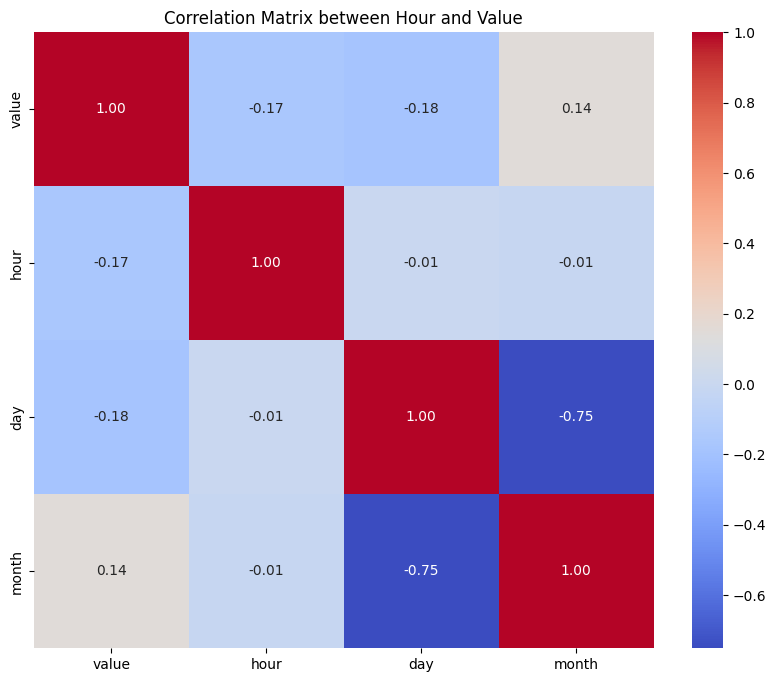

In [ ]:
features = ['value', 'hour','day','month']
corrs = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Hour and Value')
plt.show()

In [ ]:
df.drop("day_of_week",axis='columns',inplace=True)
df.columns

Index(['value', 'datetimeUtc', 'datetimeLocal', 'timezone', 'latitude',
       'longitude', 'hour', 'year', 'month', 'day', 'pollution_level',
       'average_pollution'],
      dtype='object')

In [ ]:
pf=df.drop(['value'],axis=1)

In [ ]:
X=df.drop(['value','latitude','longitude','timezone','pollution_level','year','datetimeUtc','datetimeLocal','average_pollution'],axis=1)
Y=df['value']
X

,hour,month,day
0,6,2,8
1,7,2,8
2,8,2,8
3,9,2,8
4,10,2,8
...,...,...,...
679,19,3,8
680,20,3,8
681,21,3,8
682,22,3,8


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=100,random_state=1)
rf_reg.fit(X_train,Y_train)
Y_pred=rf_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  5.131990291262136


In [ ]:
Y_avg=Y_test.mean()
mape=(mae/Y_avg)*100
print('Mean Absolute Percentage Error: ',mape)

Mean Absolute Percentage Error:  13.10836949783013


In [ ]:
mse=mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)

Mean Squared Error:  61.68411213592233


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_estimator = grid_search.best_estimator_

In [ ]:
best_estimator.fit(X_train, Y_train)
newY_pred = best_estimator.predict(X_test)

In [ ]:
mae=mean_absolute_error(Y_test,newY_pred)
print('Mean Absolute Error: ',mae)
mape=(mae/Y_avg)*100
print('Mean Absolute Percentage Error: ',mape)

Mean Absolute Error:  5.092184466019418
Mean Absolute Percentage Error:  13.006695598264105


In [ ]:
mse = mean_squared_error(Y_test, newY_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 58.98272961165048


R-squared: 0.6936065242823507


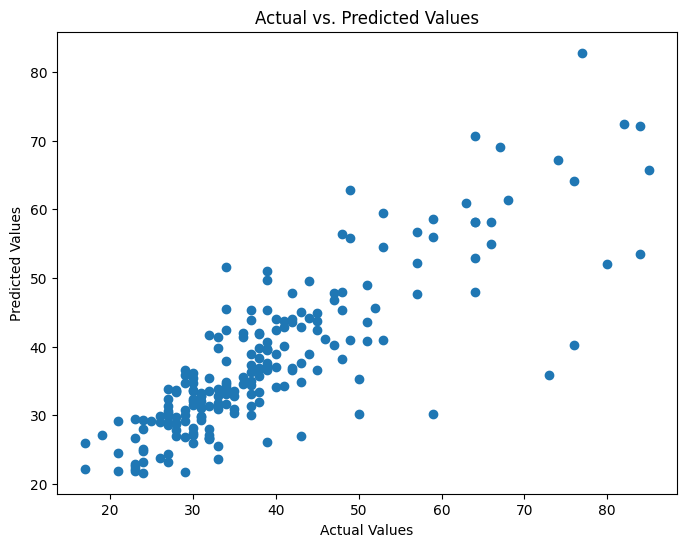

In [ ]:
from sklearn.metrics import r2_score

# Evaluate R-squared
r2 = r2_score(Y_test, newY_pred)
print("R-squared:", r2)

# Visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, newY_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


feature_importances:
1.day: 0.5264212613972264
2.hour: 0.4572716155284055
3.month: 0.016307123074368178


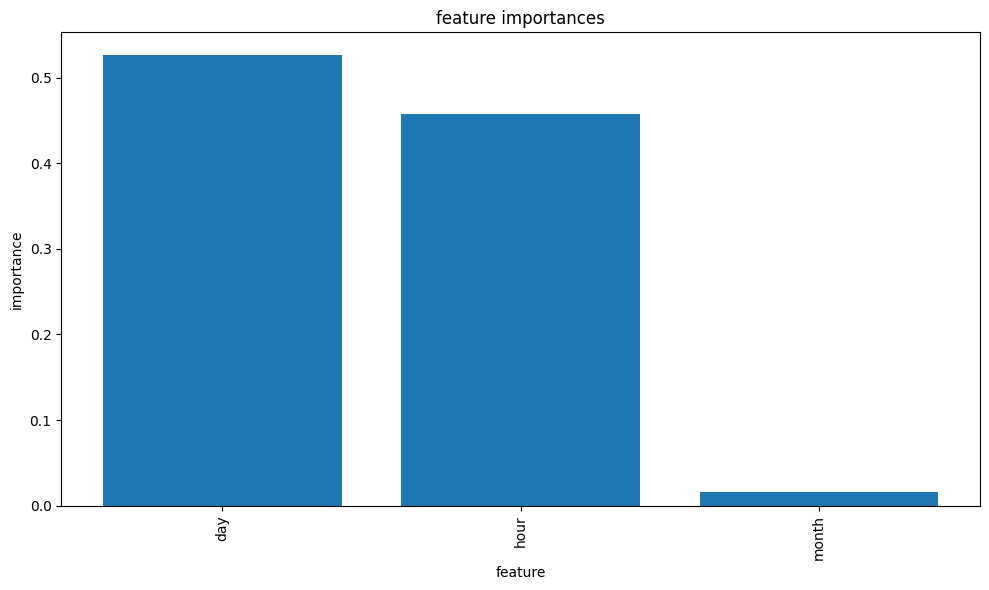

In [ ]:
feature_importances = rf_reg.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("feature_importances:")
for i,idx in enumerate(indices):
  print(f"{i+1}.{X.columns[idx]}: {feature_importances[idx]}")
plt.figure(figsize=(10, 6))
plt.title("feature importances")
plt.bar(range(X_train.shape[1]),feature_importances[indices],align="center")
plt.xticks(range(X_train.shape[1]),np.array(X.columns)[indices],rotation = 90)
plt.xlabel("feature")
plt.ylabel("importance")
plt.tight_layout()
plt.show()

In [ ]:
ndf = pd.read_csv('/content/sample_data/chennai_feb_50.csv')
ndf=ndf[necessary_cols]

In [ ]:
ndf['datetimeLocal']=pd.to_datetime(ndf['datetimeLocal'])

In [ ]:
ndf['hour'] = ndf['datetimeLocal'].dt.hour
ndf['month'] = ndf['datetimeLocal'].dt.month
ndf['day'] = ndf['datetimeLocal'].dt.day

In [ ]:
X_new=ndf.drop(['value','latitude','longitude','timezone','datetimeUtc','datetimeLocal'],axis=1)
X_new

,hour,month,day
0,1,2,19
1,2,2,19
2,3,2,19
3,4,2,19
4,5,2,19
5,6,2,19
6,7,2,19
7,8,2,19
8,9,2,19
9,10,2,19


In [ ]:
y_pred_new = best_estimator.predict(X_new)
ndf['predictions']=y_pred_new
actual_values = ndf['value']

In [ ]:
mae=mean_absolute_error(actual_values,y_pred_new)
print('Mean Absolute Error: ',mae)
mape=(mae/Y_avg)*100
print('Mean Absolute Percentage Error: ',mape)

Mean Absolute Error:  3.1482000000000006
Mean Absolute Percentage Error:  8.041279603223808


In [ ]:
mse = mean_squared_error(actual_values, y_pred_new)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22.908612


R-squared: 0.8965844528710726


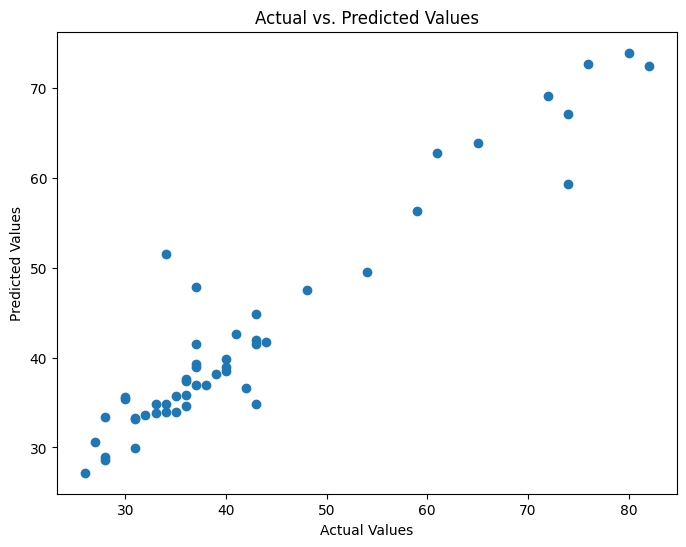

In [ ]:
from sklearn.metrics import r2_score

# Evaluate R-squared
r2 = r2_score(actual_values, y_pred_new)
print("R-squared:", r2)

# Visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, y_pred_new)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
